## Dataset preparation for Signal Processing

### Import required packages

In [1]:
# Data handling and plotting
import pandas as pd
import IPython.display as ipd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [16,8] # spectrogram / figure size - adjust for your display

# Audio handling
from opensoundscape.audio import Audio
from opensoundscape.spectrogram import Spectrogram

### Download dataset

PNRE (Eastern North American birds): Comprises of 385 minutes of dawn chorus soundscapes for 48 species collected in the Northeastern United States at Powdermill Nature Reserve, Rector, Pennsylvania, USA through autonomous acoustic recorders between the months of April through July 2018. 

    ref: [Chronister LM, Rhinehart TA, Place A, Kitzes J. An annotated set of audio recordings of Eastern North American birds containing frequency, time, and species information. Ecology. 2021 Jun;102(6):e03329. doi: 10.1002/ecy.3329. Epub 2021 May 11. PMID: 33705568.](https://esajournals.onlinelibrary.wiley.com/doi/full/10.1002/ecy.3329)

In [2]:
# dataset download 
# wget

# set the path to the data
data_path = './doi_10/'

We choose one particular species Northern Flicker (Colaptes auratus) from this dataset that has a song conducive to analysis by the signal processing methods.

Clip 1 of 70: ('Recording_1_Segment_23', 17.219172932, 19.750293605), Frequency: (2482.6, 3499.1)


/Users/jk/opt/anaconda3/envs/opso/lib/python3.9/site-packages/opensoundscape/audio.py:316: UserWarning: Audio object is shorter than requested duration: 2.53109375 sec instead of 2.531120673 sec
  warnings.warn(error_msg)


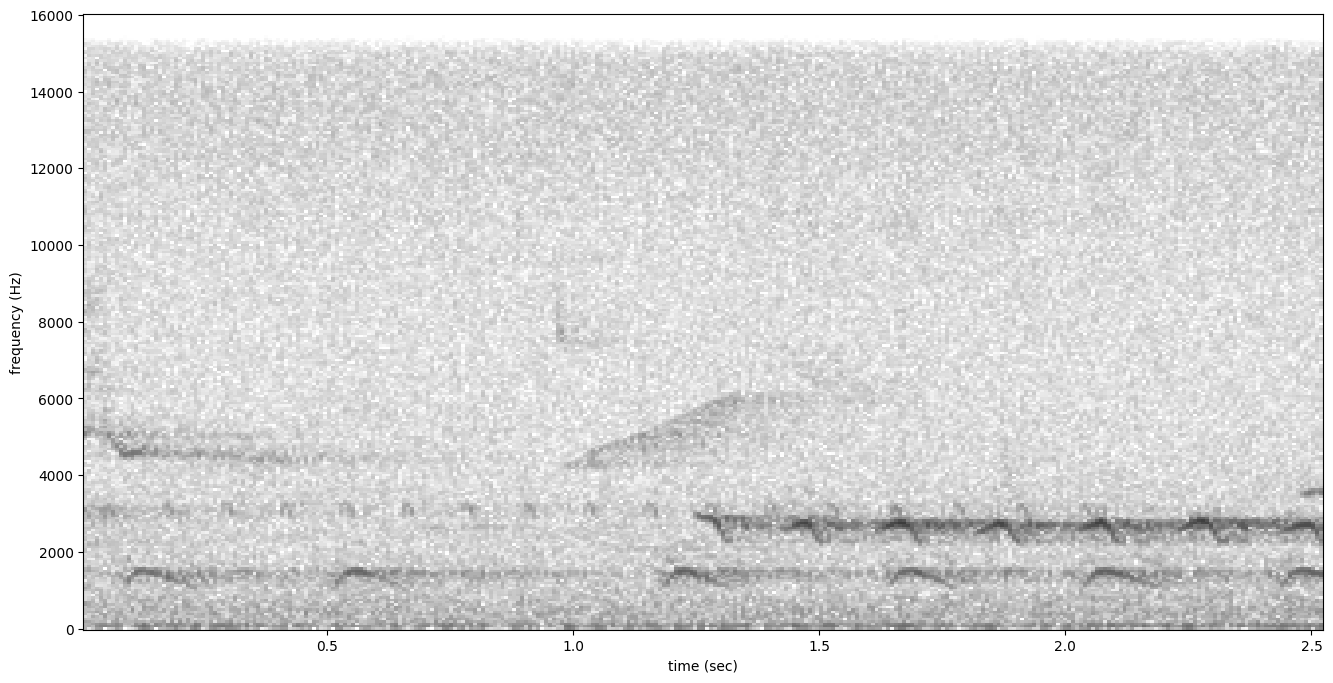

Annotation: NOFL, Call type: keek, Comment: keek towards the end?
Exited.


In [6]:
# Analyze
nofl_df = pd.read_csv('./data/nofl_df.csv', index_col=[0,1,2])
annotation_map = {-1:'Not NOFL', 0:'Unsure', 1:'NOFL'}
call_type_dict = {0: 'na', 1:'keek', 2:'drum', 3:'kleer', 4:'wik-a', 5:'kwirr'}
for num, (idx, row) in enumerate(nofl_df.iterrows()):
    
    print(f"Clip {num} of {nofl_df.shape[0]-1}: {idx}, Frequency: ({row['low_f']}, {row['high_f']})")
    audio = Audio.from_file(row['audio'], offset=idx[1], duration=idx[2]-idx[1])
    ipd.display(ipd.Audio(audio.samples, rate=audio.sample_rate))
    Spectrogram.from_audio(audio).plot()
    print(f"Annotation: {row['annotation']}, Call type: {row['call_type']}, Comment: {row['comment']}")
    
    chk_flg = input('Reannotate? [y/n/X]: ')
    if chk_flg == 'y':
        
        annotation = int(input(f'NOFL? {list(annotation_map.items())}: '))
        call_type = int(input(f'Call type? {list(call_type_dict.items())}: '))
        comment = input('Comment: ')
        nofl_df.loc[idx, ['annotation', 'call_type', 'comment']] = (annotation_map[annotation], call_type_dict[call_type], comment)
    
        nofl_df.to_csv('./data/nofl_df.csv')
        print('Annotation saved.')
    elif chk_flg == 'X':
        print('Exited.')
        break

    ipd.clear_output()

In [7]:
nofl_df = pd.read_csv('./data/nofl_df.csv', index_col=[0,1,2])
nofl_df.value_counts('call_type')

call_type
kleer    24
keek     22
na       13
wik-a    10
drum      1
kwirr     1
dtype: int64

In [5]:
nofl_df

low_f  high_f  \
clip                   start_time end_time                     
Recording_1_Segment_23 4.912606   6.277001    2639.0  3303.6   
                       17.219173  19.750294   2482.6  3499.1   
                       100.463319 104.715601  2595.3  3570.9   
                       122.952207 126.447564  2397.6  3399.9   
                       169.728967 171.228354  2456.6  3596.4   
...                                              ...     ...   
Recording_4_Segment_21 92.210881  95.088153   1096.5  1774.4   
                       200.621334 202.561107  1056.6  3289.6   
                       254.053976 256.531137  1016.8  2044.6   
Recording_4_Segment_22 49.344621  51.007190   1747.6  2416.9   
Recording_4_Segment_26 31.751193  32.818003   1915.0  2844.6   

                                                                                          raven  \
clip                   start_time end_time                                                        
Recording_1_Segment_23 4.912606   6.277001    doi_10/annotation_Files/Recording_1/Recording_...   
                       17.219173  19.750294   doi_10/annotation_Files/Recording_1/Recording_...   
                       100.463319 104.715601  doi_10/annotation_Files/Recording_1/Recording_...   
                       122.952207 126.447564  doi_10/annotation_Files/Recording_1/Recording_...   
                       169.728967 171.228354  doi_10/annotation_Files/Recording_1/Recording_...   
...                                                                                         ...   
Recording_4_Segment_21 92.210881  95.088153   doi_10/annotation_Files/Recording_4/Recording_...   
                       200.621334 202.561107  doi_10/annotation_Files/Recording_4/Recording_...   
                       254.053976 256.531137  doi_10/annotation_Files/Recording_4/Recording_...   
Recording_4_Segment_22 49.344621  51.007190   doi_10/annotation_Files/Recording_4/Recording_...   
Recording_4_Segment_26 31.751193  32.818003   doi_10/annotation_Files/Recording_4/Recording_...   

                                                                                          audio  \
clip                   start_time end_time                                                        
Recording_1_Segment_23 4.912606   6.277001    doi_10/wav_Files/Recording_1/Recording_1_Segme...   
                       17.219173  19.750294   doi_10/wav_Files/Recording_1/Recording_1_Segme...   
                       100.463319 104.715601  doi_10/wav_Files/Recording_1/Recording_1_Segme...   
                       122.952207 126.447564  doi_10/wav_Files/Recording_1/Recording_1_Segme...   
                       169.728967 171.228354  doi_10/wav_Files/Recording_1/Recording_1_Segme...   
...                                                                                         ...   
Recording_4_Segment_21 92.210881  95.088153   doi_10/wav_Files/Recording_4/Recording_4_Segme...   
                       200.621334 202.561107  doi_10/wav_Files/Recording_4/Recording_4_Segme...   
                       254.053976 256.531137  doi_10/wav_Files/Recording_4/Recording_4_Segme...   
Recording_4_Segment_22 49.344621  51.007190   doi_10/wav_Files/Recording_4/Recording_4_Segme...   
Recording_4_Segment_26 31.751193  32.818003   doi_10/wav_Files/Recording_4/Recording_4_Segme...   

                                             annotation call_type  \
clip                   start_time end_time                          
Recording_1_Segment_23 4.912606   6.277001     Not NOFL        na   
                       17.219173  19.750294        NOFL      keek   
                       100.463319 104.715601       NOFL      keek   
                       122.952207 126.447564       NOFL      keek   
                       169.728967 171.228354     Unsure        na   
...                                                 ...       ...   
Recording_4_Segment_21 92.210881  95.088153      Unsure      keek   
                 